# <span style="color:blue">**Der Aktien-Finder**</span> <br>

Hierbei werden Aktien anhand einer von **Susan Levermann** entwickelten Methode nach unterschiedlichen KPIs bewertet und bepunktet. Frau Levermann hat dieses Bewertungsmodell in ihrem Buch _Der entspannte Weg zum Reichtum_ literarisch beschrieben.<br>

Wir betrachten in der folgenden Applikation nur die deutschen Aktienindizes, welche nun wie folgt lauten: <br>

1. <span style="color:blue">**DAX**</span>
2. <span style="color:black">**TecDax**</span>
3. <span style="color:red">**MDAX**</span>
<br>

Die __key performance indicators__ (kurz: __KPI__) von Frau Levermann umfassen 13 Kennzahlen. 
Wir beschränken uns zunächst auf folgende vier: <br>

1. Kurs heute gegenüber Kurs von vor 6 Monaten
2. Kurs heute gegenüber Kurs von vor einem Jahr
3. Kurs-Gewinn-Verhältnis (KGV) aktuell
4. Kurs-Gewinn-Verhältnis (KGV) 5 Jahre
<br>

Für jedes dieser Kriterien gibt es folgende mögliche Punktevergaben **+1** ; **0** oder **-1** .
Die Gesamtpunktzahl ergibt den ***LEVERMAN-SCORE***.
Besitzt dieser Score mindestens 4 Punkte sollte die Aktie <span style="color:green"> ***gekauft*** </span> werden (Large Caps).
Bei Small- & Mid Caps sollten 7 Punkte beachtet werden, da kleine Unternehmen größeren Risiken ausgesetzt sind.



## Importieren gängiger APIs zum Erstellen des Dashboardes

In [14]:
# Zeitfenster definieren
import datetime
from datetime import date    

# Beginn des Zeitfenster zur Ermittlung der Kennzahlen HEUTE vor einem Jahr
start = (datetime.date.today() - datetime.timedelta(365)).isoformat()

# Beginn des Zeitfenster zur Ermittlung der Kennzahlen HEUTE vor einem halben Jahr
halftime = (datetime.date.today() - datetime.timedelta(182)).isoformat()

# Ende des Zeitfenster stellt der heutige Tag dar. 
end = (datetime.date.today() - datetime.timedelta(4)).isoformat()

# Von Heute zum Vorquartal für Kennzahl Eigenkapitalrendite erforderlich

quarterly = (datetime.date.today() - datetime.timedelta(99))


In [15]:
print(start)
print(halftime)
print(end)
print(quarterly)

2019-01-07
2019-07-09
2020-01-03
2019-09-30


In [16]:
# Benötigte API laden

import os
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import yfinance as yf
from pandas_datareader import data as pdr 
yf.pdr_override()

In [17]:
# linienstaerke definieren

paper_rc = {'lines.linewidth': 0.9, 'lines.markersize': 10}
sns.set_context('paper', rc = paper_rc)

## Datenbezug der Indizes DAX, TecDAX, MDAX erstellen

### Aktien von DAX laden

In [18]:

# DAX Chart vom letzten Jahr laden.

dax_m = pdr.get_data_yahoo("^GDAXI", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


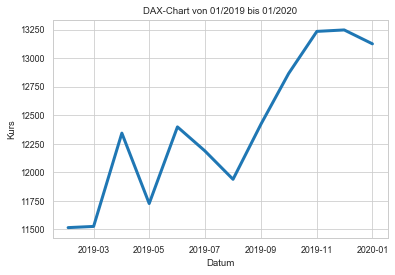

In [19]:

# DAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(dax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('DAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)


In [20]:

# DAX-Aktien für die Berechnungen der Kursgegenüberstellungen

adidas = pdr.get_data_yahoo('ADS.DE', start=start, end=end, interval= '1d')
bmw = pdr.get_data_yahoo('BMW.DE', start=start, end=end, interval= '1d')
heise = pdr.get_data_yahoo('HEI.DE', start=start, end=end, interval= '1d')
ifx = pdr.get_data_yahoo('IFX.DE', start=start, end=end, interval= '1d')
cov = pdr.get_data_yahoo('1COV.DE', start=start, end=end, interval= '1d')
fme = pdr.get_data_yahoo('FME.DE', start=start, end=end, interval= '1d')
fre = pdr.get_data_yahoo('FRE.DE', start=start, end=end, interval= '1d')
sap = pdr.get_data_yahoo('SAP.DE', start=start, end=end, interval= '1d')
dai = pdr.get_data_yahoo('DAI.DE', start=start, end=end, interval= '1d')
muv2 = pdr.get_data_yahoo('MUV2.DE', start=start, end=end, interval= '1d')
vow3 = pdr.get_data_yahoo('VOW3.DE', start=start, end=end, interval= '1d')
alv = pdr.get_data_yahoo('ALV.DE', start=start, end=end, interval= '1d')
bas = pdr.get_data_yahoo('BAS.DE', start=start, end=end, interval= '1d')
lin = pdr.get_data_yahoo('LIN.DE', start=start, end=end, interval= '1d')
bayn = pdr.get_data_yahoo('BAYN.DE', start=start, end=end, interval= '1d')
dpw = pdr.get_data_yahoo('DPW.DE', start=start, end=end, interval= '1d')
dte = pdr.get_data_yahoo('DTE.DE', start=start, end=end, interval= '1d')
con = pdr.get_data_yahoo('CON.DE', start=start, end=end, interval= '1d')
vna = pdr.get_data_yahoo('VNA.DE', start=start, end=end, interval= '1d')
bei = pdr.get_data_yahoo('BEI.DE', start=start, end=end, interval= '1d')
mrk = pdr.get_data_yahoo('MRK.DE', start=start, end=end, interval= '1d')
rwe = pdr.get_data_yahoo('RWE.DE', start=start, end=end, interval= '1d')
hen3 = pdr.get_data_yahoo('HEN3.DE', start=start, end=end, interval= '1d')
lha = pdr.get_data_yahoo('LHA.DE', start=start, end=end, interval= '1d')
eon = pdr.get_data_yahoo('EOAN.DE', start=start, end=end, interval= '1d')
sie = pdr.get_data_yahoo('SIE.DE', start=start, end=end, interval= '1d')
dbahn = pdr.get_data_yahoo('DB1.DE', start=start, end=end, interval= '1d')
tka = pdr.get_data_yahoo('TKA.DE', start=start, end=end, interval= '1d')
wdi = pdr.get_data_yahoo('WDI.DE', start=start, end=end, interval= '1d')
arl = pdr.get_data_yahoo('ARL.DE', start=start, end=end, interval= '1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [21]:
# DAX: Aktien-Ticker für die Berechnung der Eigenkapitalrendite

adidas_tck= yf.Ticker('ADS.DE')
allianz_tck= yf.Ticker('ALV.DE')
basf_tck= yf.Ticker('BSF.DE')
bayer_tck= yf.Ticker('BAYN.DE')
beiersdorf_tck= yf.Ticker('BEI.DE')
bmw_tck= yf.Ticker('BMW.DE')
continental_tck= yf.Ticker('CON.DE')
covestro_tck= yf.Ticker('1COV.DE')
daimler_tck= yf.Ticker('DAI.DE')
deutschebank_tck= yf.Ticker('DBK.DE')
deutschebörse_tck= yf.Ticker('DB1.DE')
deutschepost_tck= yf.Ticker('DPW.DE')
deutschetelekom_tck= yf.Ticker('DTE.DE')
eon_tck= yf.Ticker('EOAN.DE')
freseniusmedcare_tck= yf.Ticker('FME.DE')
freseniusse_tck= yf.Ticker('FRE.DE')
heidelbergzement_tck= yf.Ticker('HEI.DE')
henkel_tck= yf.Ticker('HEN3.DE')
infineon_tck= yf.Ticker('IFX.DE')
linde_tck= yf.Ticker('LIN.DE')
lufthansa_tck= yf.Ticker('LHA.DE')
merck_tck= yf.Ticker('MRK.DE')
mtuaeroengines_tck= yf.Ticker('MTX.F')
münchnerrückversicherungsgesellschaft_tck= yf.Ticker('MUV2.DE')
rwe_tck= yf.Ticker('RWE.DE')
sap_tck= yf.Ticker('SAP.DE')
siemens_tck= yf.Ticker('SIE.DE')
volkswagen_tck= yf.Ticker('VOW3.DE')
venovia_tck= yf.Ticker('VNA.DE')
wirecard_tck= yf.Ticker('WDI.DE')


### Aktien von MDAX laden

In [22]:
# DAX Chart vom letzten Jahr laden.

mdax_m = pdr.get_data_yahoo("^MDAXI", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


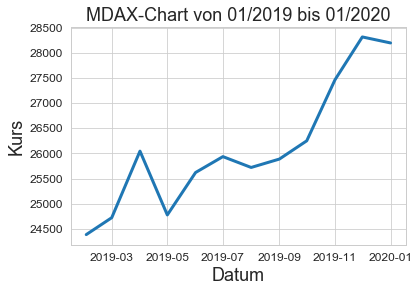

In [23]:
# MDAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(mdax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('MDAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [24]:

# Über den Yahoo finance API mit den oben definierten Startwerten einlesen.

snh = pdr.get_data_yahoo('SNH.DE', start=start, end=end, interval= '1d')
fie = pdr.get_data_yahoo('FIE.DE', start=start, end=end, interval= '1d')
deq = pdr.get_data_yahoo('DEQ.DE', start=start, end=end, interval= '1d')
evd = pdr.get_data_yahoo('EVD.DE', start=start, end=end, interval= '1d')
sha = pdr.get_data_yahoo('SHA.DE', start=start, end=end, interval= '1d')
gil = pdr.get_data_yahoo('GIL.DE', start=start, end=end, interval= '1d')
osr = pdr.get_data_yahoo('OSR.DE', start=start, end=end, interval= '1d')
hnr1 = pdr.get_data_yahoo('HNR1.DE', start=start, end=end, interval= '1d')
jun = pdr.get_data_yahoo('JUN3.DE', start=start, end=end, interval= '1d')
szu = pdr.get_data_yahoo('SZU.DE', start=start, end=end, interval= '1d')
fpe3 = pdr.get_data_yahoo('FPE3.DE', start=start, end=end, interval= '1d')
teg = pdr.get_data_yahoo('TEG.DE', start=start, end=end, interval= '1d')
arl = pdr.get_data_yahoo('ARL.DE', start=start, end=end, interval= '1d')
leg = pdr.get_data_yahoo('LEG.DE', start=start, end=end, interval= '1d')
#saz = pdr.get_data_yahoo('SAZ.DE', start=start, end=end, interval= '1d')
krn = pdr.get_data_yahoo('KRN.DE', start=start, end=end, interval= '1d')
kgx = pdr.get_data_yahoo('KGX.DE', start=start, end=end, interval= '1d')
zal = pdr.get_data_yahoo('ZAL.DE', start=start, end=end, interval= '1d')
rrtl = pdr.get_data_yahoo('RRTL.DE', start=start, end=end, interval= '1d')
boss = pdr.get_data_yahoo('BOSS.DE', start=start, end=end, interval= '1d')
gxi = pdr.get_data_yahoo('GXI.DE', start=start, end=end, interval= '1d')
evk = pdr.get_data_yahoo('EVK.DE', start=start, end=end, interval= '1d')
hot = pdr.get_data_yahoo('HOT.DE', start=start, end=end, interval= '1d')
noej = pdr.get_data_yahoo('NOEJ.DE', start=start, end=end, interval= '1d')
lxs = pdr.get_data_yahoo('LXS.DE', start=start, end=end, interval= '1d')
#meo = pdr.get_data_yahoo('MEO.DE', start=start, end=end, interval= '1d')
rhk = pdr.get_data_yahoo('RHK.DE', start=start, end=end, interval= '1d')
due = pdr.get_data_yahoo('DUE.DE', start=start, end=end, interval= '1d')
fra = pdr.get_data_yahoo(('FRA.DE'), start=start, end=end, interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [25]:
# MDAX: Aktien-Ticker für die Berechnung der Eigenkapitalrendite

snh_tck=yf.Ticker('SNH.DE')
fie_tck=yf.Ticker('FIE.DE')
deq_tck=yf.Ticker('DEQ.DE')
evd_tck=yf.Ticker('EVD.DE')
sha_tck=yf.Ticker('SHA.DE')
gil_tck=yf.Ticker('GIL.DE')
osr_tck=yf.Ticker('OSR.DE')
hnr1_tck=yf.Ticker('HNR1.DE')
jun3_tck=yf.Ticker('JUN3.DE')
szu_tck=yf.Ticker('SZU.DE')
fpe3_tck=yf.Ticker('FPE3.DE')
teg_tck=yf.Ticker('TEG.DE')
arl_tck=yf.Ticker('ARL.DE')
#1cov_tck=yf.Ticker('1COV.DE')
leg_tck=yf.Ticker('LEG.DE')
saz_tck=yf.Ticker('SAZ.DE')
krn_tck=yf.Ticker('KRN.DE')
kgx_tck=yf.Ticker('KGX.DE')
zal_tck=yf.Ticker('ZAL.DE')
rrtl_tck=yf.Ticker('RRTL.DE')
boss_tck=yf.Ticker('BOSS.DE')
gxi_tck=yf.Ticker('GXI.DE')
evk_tck=yf.Ticker('EVK.DE')
hot_tck=yf.Ticker('HOT.DE')
noej_tck=yf.Ticker('NOEJ.DE')
lxs_tck=yf.Ticker('LXS.DE')
#meo_tck=yf.Ticker('MEO.DE')
rhk_tck=yf.Ticker('RHK.DE')
due_tck=yf.Ticker('DUE.DE')
fra_tck=yf.Ticker('FRA.DE')



### Aktien vom TecDax laden

In [26]:
# DAX Chart vom letzten Jahr laden.

tecdax_m = pdr.get_data_yahoo("^TECDAX", start=start, end= end, interval='1mo')

[*********************100%***********************]  1 of 1 completed


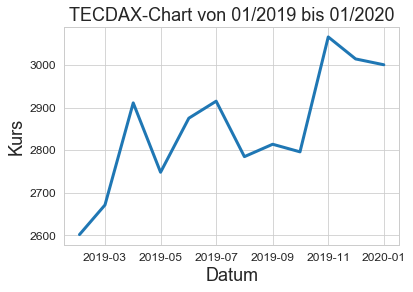

In [27]:
# TECDAX-Chart über den oben definierten Zeitraum plotten.
plt.plot(tecdax_m['Adj Close'], lw=3)
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.title('TECDAX-Chart von 01/2019 bis 01/2020')



SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [28]:
#o1bc = pdr.get_data_yahoo('O1BC.DE', start=start, end=end, interval= '1d')
cok = pdr.get_data_yahoo('COK.DE', start=start, end=end, interval= '1d')
drw3 = pdr.get_data_yahoo('DRW3.DE', start=start, end=end, interval= '1d')
cop = pdr.get_data_yahoo('COP.DE', start=start, end=end, interval= '1d')
afx = pdr.get_data_yahoo('AFX.DE', start=start, end=end, interval= '1d')
nem = pdr.get_data_yahoo('NEM.DE', start=start, end=end, interval= '1d')
qia = pdr.get_data_yahoo('QIA.DE', start=start, end=end, interval= '1d')
wdi = pdr.get_data_yahoo('WDI.DE', start=start, end=end, interval= '1d')
o2d = pdr.get_data_yahoo('O2D.DE', start=start, end=end, interval= '1d')
pfv = pdr.get_data_yahoo('PFV.DE', start=start, end=end, interval= '1d')
sbs = pdr.get_data_yahoo('SBS.DE', start=start, end=end, interval= '1d')
srt3 = pdr.get_data_yahoo('SRT3.DE', start=start, end=end, interval= '1d')
s92 = pdr.get_data_yahoo('S92.DE', start=start, end=end, interval= '1d')
fntn = pdr.get_data_yahoo('FNTN.DE', start=start, end=end, interval= '1d')
utdi = pdr.get_data_yahoo('UTDI.DE', start=start, end=end, interval= '1d')
am3d = pdr.get_data_yahoo('AM3D.DE', start=start, end=end, interval= '1d')
mor = pdr.get_data_yahoo('MOR.DE', start=start, end=end, interval= '1d')
sow = pdr.get_data_yahoo('SOW.DE', start=start, end=end, interval= '1d')
jen = pdr.get_data_yahoo('JEN.DE', start=start, end=end, interval= '1d')
gft = pdr.get_data_yahoo('GFT.DE', start=start, end=end, interval= '1d')
ndx1 = pdr.get_data_yahoo('NDX1.DE', start=start, end=end, interval= '1d')
dlg = pdr.get_data_yahoo('DLG.DE', start=start, end=end, interval= '1d')
dri = pdr.get_data_yahoo('DRI.DE', start=start, end=end, interval= '1d')
smhn = pdr.get_data_yahoo('SMHN.DE', start=start, end=end, interval= '1d')
bc8 = pdr.get_data_yahoo('BC8.DE', start=start, end=end, interval= '1d')
aixa = pdr.get_data_yahoo('AIXA.DE', start=start, end=end, interval= '1d')
adv = pdr.get_data_yahoo('ADV.DE', start=start, end=end, interval= '1d')
evt = pdr.get_data_yahoo('EVT.DE', start=start, end=end, interval= '1d')
waf = pdr.get_data_yahoo('WAF.DE', start=start, end=end, interval= '1d')
rib = pdr.get_data_yahoo('RIB.DE', start=start, end=end, interval= '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [29]:
# TecDAX: Aktien-Ticker für die Berechnung der Eigenkapitalrendite

o1bc_tck=yf.Ticker('O1BC.DE ')
cok_tck=yf.Ticker('COK.DE ')
drw3_tck=yf.Ticker('DRW3.DE ')
cop_tck=yf.Ticker('COP.DE ')
afx_tck=yf.Ticker('AFX.DE ')
nem_tck=yf.Ticker('NEM.DE ')
qia_tck=yf.Ticker('QIA.DE ')
wdi_tck=yf.Ticker('WDI.DE ')
o2d_tck=yf.Ticker('O2D.DE ')
pfv_tck=yf.Ticker('PFV.DE ')
sbs_tck=yf.Ticker('SBS.DE ')
srt3_tck=yf.Ticker('SRT3.DE ')
s92_tck=yf.Ticker('S92.DE ')
fntn_tck=yf.Ticker('FNTN.DE ')
utdi_tck=yf.Ticker('UTDI.DE ')
am3d_tck=yf.Ticker('AM3D.DE ')
mor_tck=yf.Ticker('MOR.DE ')
sow_tck=yf.Ticker('SOW.DE ')
jen_tck=yf.Ticker('JEN.DE ')
gft_tck=yf.Ticker('GFT.DE ')
ndx1_tck=yf.Ticker('NDX1.DE ')
dlg_tck=yf.Ticker('DLG.DE ')
dri_tck=yf.Ticker('DRI.DE ')
smhn_tck=yf.Ticker('SMHN.DE ')
bc8_tck=yf.Ticker('BC8.DE ')
aixa_tck=yf.Ticker('AIXA.DE ')
adv_tck=yf.Ticker('ADV.DE ')
evt_tck=yf.Ticker('EVT.DE ')
waf_tck=yf.Ticker('WAF.DE ')
rib_tck=yf.Ticker('RIB.DE ')

# DAX: Selektieren nach der Spalte Adj Close

In [30]:
# Selektieren nach dem Adj Close 

adidasclose=adidas['Adj Close']
bmwclose=bmw['Adj Close']
heiseclose=heise['Adj Close']
ifxclose=ifx['Adj Close']
covclose=cov['Adj Close']
fmeclose=fme['Adj Close']
freclose=fre['Adj Close']
sapclose=sap['Adj Close']
daiclose=dai['Adj Close']
muv2close=muv2['Adj Close']
vow3close=vow3['Adj Close']
alvclose=alv['Adj Close']
basclose=bas['Adj Close']
linclose=lin['Adj Close']
baynclose=bayn['Adj Close']
dpwclose=dpw['Adj Close']
dteclose=dte['Adj Close']
conclose=con['Adj Close']
vnaclose=vna['Adj Close']
beiclose=bei['Adj Close']
mrkclose=mrk['Adj Close']
rweclose=rwe['Adj Close']
hen3close=hen3['Adj Close']
lhaclose=lha['Adj Close']
eonclose=eon['Adj Close']
sieclose=sie['Adj Close']
dbahnclose=dbahn['Adj Close']
tkaclose=tka['Adj Close']
wdiclose=wdi['Adj Close']
arlclose=arl['Adj Close']




## MDAX: Selektieren nach der Spalte Adj Close

In [31]:
snhclose = snh['Adj Close']
fieclose = fie['Adj Close']
deqclose = deq['Adj Close']
evdclose = evd['Adj Close']
shaclose = sha['Adj Close']
gilclose = gil['Adj Close']
osrclose = osr['Adj Close']
hnr1close = hnr1['Adj Close']
junclose = jun['Adj Close']
szuclose = szu['Adj Close']
fpe3close = fpe3['Adj Close']
tegclose = teg['Adj Close']
arlclose = arl['Adj Close']
#1covclose = 1cov['Adj Close']
legclose = leg['Adj Close']
#sazclose = saz['Adj Close']
krnclose = krn['Adj Close']
kgxclose = kgx['Adj Close']
zalclose = zal['Adj Close']
rrtlclose = rrtl['Adj Close']
bossclose = boss['Adj Close']
gxiclose = gxi['Adj Close']
evkclose = evk['Adj Close']
hotclose = hot['Adj Close']
noejclose = noej['Adj Close']
lxsclose = lxs['Adj Close']
#meoclose = meo['Adj Close']
rhkclose = rhk['Adj Close']
dueclose = due['Adj Close']
fraclose = fra['Adj Close']


## TecDax: Selektieren nach der Spalte Adj Close

In [32]:
#o1bcclose = o1bc['Adj Close']
cokclose = cok['Adj Close']
drw3close = drw3['Adj Close']
copclose = cop['Adj Close']
afxclose = afx['Adj Close']
nemclose = nem['Adj Close']
qiaclose = qia['Adj Close']
wdiclose = wdi['Adj Close']
o2dclose = o2d['Adj Close']
pfvclose = pfv['Adj Close']
sbsclose = sbs['Adj Close']
srt3close = srt3['Adj Close']
s92close = s92['Adj Close']
fntnclose = fntn['Adj Close']
utdiclose = utdi['Adj Close']
am3dclose = am3d['Adj Close']
morclose = mor['Adj Close']
sowclose = sow['Adj Close']
jenclose = jen['Adj Close']
gftclose = gft['Adj Close']
ndx1close = ndx1['Adj Close']
dlgclose = dlg['Adj Close']
driclose = dri['Adj Close']
smhnclose = smhn['Adj Close']
bc8close = bc8['Adj Close']
aixaclose = aixa['Adj Close']
advclose = adv['Adj Close']
evtclose = evt['Adj Close']
wafclose = waf['Adj Close']
ribclose = rib['Adj Close']


# DAX: Berechnungen der Kursgegenüberstellung von Heute zu vor einem Jahr

In [65]:
data = {'Name':['adidas','bmw','heise','ifx','cov',
                'fme','fre','sap','dai','muv2',
                'vow3','alv','bas','lin','bayn','dpw',
                'dte','con','vna','bei','mrk','rwe',
                'hen3','lha','eon','sie','dbahn','tka',
                'wdi','arl'],'Score':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]} 
rangliste_dax = pd.DataFrame(data)

adidas_1y=((adidasclose[end]-adidasclose[start])/adidasclose[start]* 100)
bmw_1y=((bmwclose[end]-bmwclose[start])/bmwclose[start]* 100)
heise_1y=((heiseclose[end]-heiseclose[start])/heiseclose[start]* 100)
ifx_1y=((ifxclose[end]-ifxclose[start])/ifxclose[start]* 100)
cov_1y=((covclose[end]-covclose[start])/covclose[start]* 100)
fme_1y=((fmeclose[end]-fmeclose[start])/fmeclose[start]* 100)
#fre_1y=((freclose[end]-freclose[start])/freclose[start]* 100)
sap_1y=((sapclose[end]-sapclose[start])/sapclose[start]* 100)
dai_1y=((daiclose[end]-daiclose[start])/daiclose[start]* 100)
muv2_1y=((muv2close[end]-muv2close[start])/muv2close[start]* 100)
vow3_1y=((vow3close[end]-vow3close[start])/vow3close[start]* 100)
alv_1y=((alvclose[end]-alvclose[start])/alvclose[start]* 100)
bas_1y=((basclose[end]-basclose[start])/basclose[start]* 100)
lin_1y=((linclose[end]-linclose[start])/linclose[start]* 100)
bayn_1y=((baynclose[end]-baynclose[start])/baynclose[start]* 100)
dpw_1y=((dpwclose[end]-dpwclose[start])/dpwclose[start]* 100)
dte_1y=((dteclose[end]-dteclose[start])/dteclose[start]* 100)
con_1y=((conclose[end]-conclose[start])/conclose[start]* 100)
vna_1y=((vnaclose[end]-vnaclose[start])/vnaclose[start]* 100)
bei_1y=((beiclose[end]-beiclose[start])/beiclose[start]* 100)
mrk_1y=((mrkclose[end]-mrkclose[start])/mrkclose[start]* 100)
rwe_1y=((rweclose[end]-rweclose[start])/rweclose[start]* 100)
hen3_1y=((hen3close[end]-hen3close[start])/hen3close[start]* 100)
lha_1y=((lhaclose[end]-lhaclose[start])/lhaclose[start]* 100)
#eon_1y=((eonclose[end]-eonclose[start])/eonclose[start]* 100)
sie_1y=((sieclose[end]-sieclose[start])/sieclose[start]* 100)
dbahn_1y=((dbahnclose[end]-dbahnclose[start])/dbahnclose[start]* 100)
tka_1y=((tkaclose[end]-tkaclose[start])/tkaclose[start]* 100)
wdi_1y=((wdiclose[end]-wdiclose[start])/wdiclose[start]* 100)
arl_1y=((arlclose[end]-arlclose[start])/arlclose[start]* 100)

def bewertung_1jahr_dax(Wert,Unternehmen):
    if Wert > 5:
        rangliste_dax.loc[rangliste_dax.Name == Unternehmen, 'Score'] = rangliste_dax.Score + 1
    elif Wert < -5:
        rangliste_dax.loc[rangliste_dax.Name == Unternehmen, 'Score'] = rangliste_dax.Score - 1
        
bewertung_1jahr_dax(adidas_1y,'adidas')
bewertung_1jahr_dax(bmw_1y,'bmw')
bewertung_1jahr_dax(heise_1y,'heise')
bewertung_1jahr_dax(ifx_1y,'ifx')
bewertung_1jahr_dax(cov_1y,'cov')
bewertung_1jahr_dax(fme_1y,'fme')
#bewertung_1jahr_dax(fre_1y,'fre')
bewertung_1jahr_dax(sap_1y,'sap')
bewertung_1jahr_dax(dai_1y,'dai')
bewertung_1jahr_dax(muv2_1y,'muv2')
bewertung_1jahr_dax(vow3_1y,'vow3')
bewertung_1jahr_dax(alv_1y,'alv')
bewertung_1jahr_dax(bas_1y,'bas')
bewertung_1jahr_dax(lin_1y,'lin')
bewertung_1jahr_dax(bayn_1y,'bayn')
bewertung_1jahr_dax(dpw_1y,'dpw')
bewertung_1jahr_dax(dte_1y,'dte')
bewertung_1jahr_dax(con_1y,'con')
bewertung_1jahr_dax(vna_1y,'vna')
bewertung_1jahr_dax(bei_1y,'bei')
bewertung_1jahr_dax(mrk_1y,'mrk')
bewertung_1jahr_dax(rwe_1y,'rwe')
bewertung_1jahr_dax(hen3_1y,'hen3')
bewertung_1jahr_dax(lha_1y,'lha')
#bewertung_1jahr_dax(eon_1y,'eon')
bewertung_1jahr_dax(sie_1y,'sie')
bewertung_1jahr_dax(dbahn_1y,'dbahn')
bewertung_1jahr_dax(tka_1y,'tka')
bewertung_1jahr_dax(wdi_1y,'wdi')
bewertung_1jahr_dax(arl_1y,'arl')

print(rangliste_dax)

      Name  Score
0   adidas      1
1      bmw      1
2    heise      1
3      ifx      1
4      cov      0
5      fme      1
6      fre      0
7      sap      1
8      dai      1
9     muv2      1
10    vow3      1
11     alv      1
12     bas      1
13     lin      1
14    bayn      1
15     dpw      1
16     dte      0
17     con     -1
18     vna      1
19     bei      1
20     mrk      1
21     rwe      1
22    hen3      0
23     lha     -1
24     eon      0
25     sie      1
26   dbahn      1
27     tka     -1
28     wdi     -1
29     arl      1


In [59]:
print(adidas)['2019-06-03']

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-07  189.149994  191.300003  189.000000  189.699997  187.156494   
2019-01-08  189.699997  197.100006  189.500000  194.300003  191.694809   
2019-01-09  195.699997  198.149994  192.800003  193.850006  191.250854   
2019-01-10  192.899994  196.199997  192.850006  195.500000  192.878723   
2019-01-11  196.199997  198.149994  195.600006  197.000000  194.358612   
2019-01-14  195.000000  198.000000  194.399994  197.300003  194.654587   
2019-01-15  198.350006  199.250000  195.949997  199.250000  196.578445   
2019-01-16  199.899994  200.199997  196.500000  198.100006  195.443863   
2019-01-17  196.699997  200.199997  196.699997  200.000000  197.318390   
2019-01-18  200.399994  205.500000  200.000000  204.000000  201.264755   
2019-01-21  204.000000  206.000000  203.399994  206.000000  203.237946   
2019-01-22  204.800003  208.399994  20

TypeError: 'NoneType' object is not subscriptable

In [ ]:
print(adidas_1y)
print(bmw_1y)
print(heise_1y)
print(ifx_1y)
print(cov_1y)
print(fme_1y)
#print(fre_1y) <-- 2019-05-15 NaN Eintrag
print(sap_1y)
print(dai_1y)
print(muv2_1y)
print(vow3_1y)
print(alv_1y)
print(bas_1y)
print(lin_1y)
print(bayn_1y)
print(dpw_1y)
print(dte_1y)
print(con_1y)
print(vna_1y)
print(bei_1y)
print(mrk_1y)
print(rwe_1y)
print(hen3_1y)
print(lha_1y)
#print(eon_1y) <-- 2019-05-15 NaN Eintrag
print(sie_1y)
print(dbahn_1y)
print(tka_1y)
#print(wdi_1y) <-- 2019-05-15 NaN Eintrag
print(arl_1y)

## DAX: Berechnungen der Kursgegenüberstellung von Heute zu 6 Monaten

In [64]:
adidas_6mo =((adidasclose[end]-adidasclose[halftime])/adidasclose[halftime]*100)
bmw_6mo =((bmwclose[end]-bmwclose[halftime])/bmwclose[halftime]*100)
heise_6mo =((heiseclose[end]-heiseclose[halftime])/heiseclose[halftime]*100)
ifx_6mo =((ifxclose[end]-ifxclose[halftime])/ifxclose[halftime]*100)
cov_6mo =((covclose[end]-covclose[halftime])/covclose[halftime]*100)
fme_6mo =((fmeclose[end]-fmeclose[halftime])/fmeclose[halftime]*100)
fre_6mo =((freclose[end]-freclose[halftime])/freclose[halftime]*100)
sap_6mo =((sapclose[end]-sapclose[halftime])/sapclose[halftime]*100)
dai_6mo =((daiclose[end]-daiclose[halftime])/daiclose[halftime]*100)
muv2_6mo =((muv2close[end]-muv2close[halftime])/muv2close[halftime]*100)
vow3_6mo =((vow3close[end]-vow3close[halftime])/vow3close[halftime]*100)
alv_6mo =((alvclose[end]-alvclose[halftime])/alvclose[halftime]*100)
bas_6mo =((basclose[end]-basclose[halftime])/basclose[halftime]*100)
lin_6mo =((linclose[end]-linclose[halftime])/linclose[halftime]*100)
bayn_6mo =((baynclose[end]-baynclose[halftime])/baynclose[halftime]*100)
dpw_6mo =((dpwclose[end]-dpwclose[halftime])/dpwclose[halftime]*100)
dte_6mo =((dteclose[end]-dteclose[halftime])/dteclose[halftime]*100)
con_6mo =((conclose[end]-conclose[halftime])/conclose[halftime]*100)
vna_6mo =((vnaclose[end]-vnaclose[halftime])/vnaclose[halftime]*100)
bei_6mo =((beiclose[end]-beiclose[halftime])/beiclose[halftime]*100)
mrk_6mo =((mrkclose[end]-mrkclose[halftime])/mrkclose[halftime]*100)
rwe_6mo =((rweclose[end]-rweclose[halftime])/rweclose[halftime]*100)
hen3_6mo =((hen3close[end]-hen3close[halftime])/hen3close[halftime]*100)
lha_6mo =((lhaclose[end]-lhaclose[halftime])/lhaclose[halftime]*100)
eon_6mo =((eonclose[end]-eonclose[halftime])/eonclose[halftime]*100)
sie_6mo =((sieclose[end]-sieclose[halftime])/sieclose[halftime]*100)
dbahn_6mo =((dbahnclose[end]-dbahnclose[halftime])/dbahnclose[halftime]*100)
tka_6mo =((tkaclose[end]-tkaclose[halftime])/tkaclose[halftime]*100)
wdi_6mo =((wdiclose[end]-wdiclose[halftime])/wdiclose[halftime]*100)
arl_6mo =((arlclose[end]-arlclose[halftime])/arlclose[halftime]*100)

def bewertung_6mon_dax(Wert,Unternehmen):
    if Wert > 5:
        rangliste_dax.loc[rangliste_dax.Name == Unternehmen, 'Score'] = rangliste_dax.Score + 1
    elif Wert < -5:
        rangliste_dax.loc[rangliste_dax.Name == Unternehmen, 'Score'] = rangliste_dax.Score - 1

bewertung_6mon_dax(adidas_6mo,'adidas')
bewertung_6mon_dax(bmw_6mo,'bmw')
bewertung_6mon_dax(heise_6mo,'heise')
bewertung_6mon_dax(ifx_6mo,'ifx')
bewertung_6mon_dax(cov_6mo,'cov')
bewertung_6mon_dax(fme_6mo,'fme')
bewertung_6mon_dax(fre_6mo,'fre')
bewertung_6mon_dax(sap_6mo,'sap')
bewertung_6mon_dax(dai_6mo,'dai')
bewertung_6mon_dax(muv2_6mo,'muv2')
bewertung_6mon_dax(vow3_6mo,'vow3')
bewertung_6mon_dax(alv_6mo,'alv')
bewertung_6mon_dax(bas_6mo,'bas')
bewertung_6mon_dax(lin_6mo,'lin')
bewertung_6mon_dax(bayn_6mo,'bayn')
bewertung_6mon_dax(dpw_6mo,'dpw')
bewertung_6mon_dax(dte_6mo,'dte')
bewertung_6mon_dax(con_6mo,'con')
bewertung_6mon_dax(vna_6mo,'vna')
bewertung_6mon_dax(bei_6mo,'bei')
bewertung_6mon_dax(mrk_6mo,'mrk')
bewertung_6mon_dax(rwe_6mo,'rwe')
bewertung_6mon_dax(hen3_6mo,'hen3')
bewertung_6mon_dax(lha_6mo,'lha')
bewertung_6mon_dax(eon_6mo,'eon')
bewertung_6mon_dax(sie_6mo,'sie')
bewertung_6mon_dax(dbahn_6mo,'dbahn')
bewertung_6mon_dax(tka_6mo,'tka')
bewertung_6mon_dax(wdi_6mo,'wdi')
bewertung_6mon_dax(arl_6mo,'arl')
   

print(rangliste_dax)

      Name  Score
0   adidas      1
1      bmw      3
2    heise      1
3      ifx      3
4      cov      0
5      fme      1
6      fre      2
7      sap      1
8      dai      1
9     muv2      3
10    vow3      3
11     alv      1
12     bas      3
13     lin      1
14    bayn      3
15     dpw      3
16     dte     -2
17     con     -3
18     vna      3
19     bei      1
20     mrk      3
21     rwe      3
22    hen3      0
23     lha     -1
24     eon      0
25     sie      3
26   dbahn      3
27     tka     -1
28     wdi     -3
29     arl      3


In [ ]:
print(adidas_6mo)

## DAX: Berechnung der Bepunktung

## MDAX: Berechnungen der Kursgegenüberstellung von Heute zu einem Jahr

In [66]:
data = {'Name':['snh','fie','deq','evd','sha',
                'gil','osr','hnr1','jun','szu',
                'fpe3','teg','arl','leg','saz','krn',
                'kgx','zal','rrtl','boss','gxi','evk',
                'hot','noej','lxs','meo','rhk','due',
                'fra'],'Score':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]} 

rangliste_mdax = pd.DataFrame(data)

#snhclose_1y = ((snhclose[end]-snhclose[start])/snhclose[start]*100)
fieclose_1y = ((fieclose[end]-fieclose[start])/fieclose[start]*100)
deqclose_1y = ((deqclose[end]-deqclose[start])/deqclose[start]*100)
evdclose_1y = ((evdclose[end]-evdclose[start])/evdclose[start]*100)
#shaclose_1y = ((shaclose[end]-shaclose[start])/shaclose[start]*100)
#gilclose_1y = ((gilclose[end]-gilclose[start])/gilclose[start]*100)
osrclose_1y = ((osrclose[end]-osrclose[start])/osrclose[start]*100)
hnr1close_1y = ((hnr1close[end]-hnr1close[start])/hnr1close[start]*100)
junclose_1y = ((junclose[end]-junclose[start])/junclose[start]*100)
szuclose_1y = ((szuclose[end]-szuclose[start])/szuclose[start]*100)
fpe3close_1y = ((fpe3close[end]-fpe3close[start])/fpe3close[start]*100)
tegclose_1y = ((tegclose[end]-tegclose[start])/tegclose[start]*100)
arlclose_1y = ((arlclose[end]-arlclose[start])/arlclose[start]*100)
#1covclose_1y = ((1covclose[end]-1covclose[start])/1covclose[start]*100)
legclose_1y = ((legclose[end]-legclose[start])/legclose[start]*100)
#sazclose_1y = ((sazclose[end]-sazclose[start])/sazclose[start]*100)
krnclose_1y = ((krnclose[end]-krnclose[start])/krnclose[start]*100)
kgxclose_1y = ((kgxclose[end]-kgxclose[start])/kgxclose[start]*100)
#zalclose_1y = ((zalclose[end]-zalclose[start])/zalclose[start]*100)
rrtlclose_1y = ((rrtlclose[end]-rrtlclose[start])/rrtlclose[start]*100)
bossclose_1y = ((bossclose[end]-bossclose[start])/bossclose[start]*100)
gxiclose_1y = ((gxiclose[end]-gxiclose[start])/gxiclose[start]*100)
evkclose_1y = ((evkclose[end]-evkclose[start])/evkclose[start]*100)
hotclose_1y = ((hotclose[end]-hotclose[start])/hotclose[start]*100)
noejclose_1y = ((noejclose[end]-noejclose[start])/noejclose[start]*100)
lxsclose_1y = ((lxsclose[end]-lxsclose[start])/lxsclose[start]*100)
#meoclose_1y = ((meoclose[end]-meoclose[start])/meoclose[start]*100)
rhkclose_1y = ((rhkclose[end]-rhkclose[start])/rhkclose[start]*100)
dueclose_1y = ((dueclose[end]-dueclose[start])/dueclose[start]*100)
fraclose_1y = ((fraclose[end]-fraclose[start])/fraclose[start]*100)

def bewertung_1jahr_mdax(Wert,Unternehmen):
    if Wert > 5:
        rangliste_mdax.loc[rangliste_mdax.Name == Unternehmen, 'Score'] = rangliste_mdax.Score + 1
    elif Wert < -5:
        rangliste_mdax.loc[rangliste_mdax.Name == Unternehmen, 'Score'] = rangliste_mdax.Score - 1
        
#bewertung_1jahr_mdax(snhclose_1y,'snh')
bewertung_1jahr_mdax(fieclose_1y,'fie')
bewertung_1jahr_mdax(deqclose_1y,'deq')
bewertung_1jahr_mdax(evdclose_1y,'evd')
#bewertung_1jahr_mdax(shaclose_1y,'sha')
#bewertung_1jahr_mdax(gilclose_1y,'gil')
bewertung_1jahr_mdax(osrclose_1y,'osr')
bewertung_1jahr_mdax(hnr1close_1y,'hnr1')
bewertung_1jahr_mdax(junclose_1y,'jun')
bewertung_1jahr_mdax(szuclose_1y,'szu')
bewertung_1jahr_mdax(fpe3close_1y,'fpe3')
bewertung_1jahr_mdax(tegclose_1y,'teg')
bewertung_1jahr_mdax(arlclose_1y,'arl')
#bewertung_1jahr_mdax(1covclose_1y,'1cov')
bewertung_1jahr_mdax(legclose_1y,'leg')
bewertung_1jahr_mdax(krnclose_1y,'krn')
bewertung_1jahr_mdax(kgxclose_1y,'kgx')
#bewertung_1jahr_mdax(zalclose_1y,'zal')
bewertung_1jahr_mdax(rrtlclose_1y,'rrtl')
bewertung_1jahr_mdax(bossclose_1y,'boss')
bewertung_1jahr_mdax(gxiclose_1y,'gxi')
bewertung_1jahr_mdax(evkclose_1y,'evk')
bewertung_1jahr_mdax(hotclose_1y,'hot')
bewertung_1jahr_mdax(noejclose_1y,'noej')
bewertung_1jahr_mdax(lxsclose_1y,'lxs')
#bewertung_1jahr_mdax(meo_6mo,'meo')
bewertung_1jahr_mdax(rhkclose_1y,'rhk')
bewertung_1jahr_mdax(dueclose_1y,'due')
bewertung_1jahr_mdax(fraclose_1y,'fra')

print(rangliste_mdax)


    Name  Score
0    snh      0
1    fie      1
2    deq      1
3    evd      1
4    sha      0
5    gil      0
6    osr      1
7   hnr1      1
8    jun     -1
9    szu      1
10  fpe3      1
11   teg      1
12   arl      1
13   leg      1
14   saz      0
15   krn      0
16   kgx      1
17   zal      0
18  rrtl      0
19  boss     -1
20   gxi      1
21   evk      1
22   hot      0
23  noej     -1
24   lxs      1
25   meo      0
26   rhk     -1
27   due      0
28   fra      1


In [67]:
#print(snhclose_1y)
print(fieclose_1y)
print(deqclose_1y)
print(evdclose_1y)
#print(shaclose_1y)
#print(gilclose_1y)
print(osrclose_1y)
print(hnr1close_1y)
print(junclose_1y)
print(szuclose_1y)
print(fpe3close_1y)
print(tegclose_1y)
print(arlclose_1y)
#print(1covclose_1y)
print(legclose_1y)
#print(sazclose_1y)
print(krnclose_1y)
print(kgxclose_1y)
#print(zalclose_1y)
print(rrtlclose_1y)
print(bossclose_1y)
print(gxiclose_1y)
print(evkclose_1y)
print(hotclose_1y)
print(noejclose_1y)
print(lxsclose_1y)
#print(meoclose_1y)
print(rhkclose_1y)
print(dueclose_1y)
print(fraclose_1y)


33.05211527297928
10.183994062246644
62.856178005880636
24.328821535728977
51.195930275636115
-7.785140948625113
47.65328603570224
23.715117119836517
12.827515020579948
18.802263238317096
15.620283689775746
-0.1261327331711819
38.231912983138066
-3.216907777579391
-18.009980761913756
23.75950340212644
25.12994282737322
-0.1021983879543321
-11.819725761560836
41.89395856274515
-23.602741598810262
-4.613240579207443
17.785987169767452


## MDAX: Berechnung der Kursgegenüberstellung von Heute zu 6 Monate

In [68]:
snh_6mo =((snhclose[end]-snhclose[halftime])/snhclose[halftime]*100)
fie_6mo =((fieclose[end]-fieclose[halftime])/fieclose[halftime]*100)
deq_6mo =((deqclose[end]-deqclose[halftime])/deqclose[halftime]*100)
evd_6mo =((evdclose[end]-evdclose[halftime])/evdclose[halftime]*100)
#sha_6mo =((shaclose[end]-shaclose[halftime])/shaclose[halftime]*100)
#gil_6mo =((gilclose[end]-gilclose[halftime])/gilclose[halftime]*100)
osr_6mo =((osrclose[end]-osrclose[halftime])/osrclose[halftime]*100)
hnr1_6mo =((hnr1close[end]-hnr1close[halftime])/hnr1close[halftime]*100)
jun_6mo =((junclose[end]-junclose[halftime])/junclose[halftime]*100)
szu_6mo =((szuclose[end]-szuclose[halftime])/szuclose[halftime]*100)
fpe3_6mo =((fpe3close[end]-fpe3close[halftime])/fpe3close[halftime]*100)
teg_6mo =((tegclose[end]-tegclose[halftime])/tegclose[halftime]*100)
arl_6mo =((arlclose[end]-arlclose[halftime])/arlclose[halftime]*100)
#1cov_6mo =((1covclose[end]-1covclose[halftime])/1covclose[halftime]*100)
leg_6mo =((legclose[end]-legclose[halftime])/legclose[halftime]*100)
#saz_6mo =((sazclose[end]-sazclose[halftime])/sazclose[halftime]*100)
krn_6mo =((krnclose[end]-krnclose[halftime])/krnclose[halftime]*100)
kgx_6mo =((kgxclose[end]-kgxclose[halftime])/kgxclose[halftime]*100)
zal_6mo =((zalclose[end]-zalclose[halftime])/zalclose[halftime]*100)
rrtl_6mo =((rrtlclose[end]-rrtlclose[halftime])/rrtlclose[halftime]*100)
boss_6mo =((bossclose[end]-bossclose[halftime])/bossclose[halftime]*100)
gxi_6mo =((gxiclose[end]-gxiclose[halftime])/gxiclose[halftime]*100)
evk_6mo =((evkclose[end]-evkclose[halftime])/evkclose[halftime]*100)
hot_6mo =((hotclose[end]-hotclose[halftime])/hotclose[halftime]*100)
noej_6mo =((noejclose[end]-noejclose[halftime])/noejclose[halftime]*100)
lxs_6mo =((lxsclose[end]-lxsclose[halftime])/lxsclose[halftime]*100)
#meo_6mo =((meoclose[end]-meoclose[halftime])/meoclose[halftime]*100)
rhk_6mo =((rhkclose[end]-rhkclose[halftime])/rhkclose[halftime]*100)
due_6mo =((dueclose[end]-dueclose[halftime])/dueclose[halftime]*100)
fra_6mo =((fraclose[end]-fraclose[halftime])/fraclose[halftime]*100)

def bewertung_6mon_mdax(Wert,Unternehmen):
    if Wert > 5:
        rangliste_mdax.loc[rangliste_mdax.Name == Unternehmen, 'Score'] = rangliste_mdax.Score + 1
    elif Wert < -5:
        rangliste_mdax.loc[rangliste_mdax.Name == Unternehmen, 'Score'] = rangliste_mdax.Score - 1
        
bewertung_6mon_mdax(snh_6mo,'snh')
bewertung_6mon_mdax(fie_6mo,'fie')
bewertung_6mon_mdax(deq_6mo,'deq')
bewertung_6mon_mdax(evd_6mo,'evd')
#bewertung_6mon_mdax(sha_6mo,'sha')
#bewertung_6mon_mdax(gil_6mo,'gil')
bewertung_6mon_mdax(osr_6mo,'osr')
bewertung_6mon_mdax(hnr1_6mo,'hnr1')
bewertung_6mon_mdax(jun_6mo,'jun')
bewertung_6mon_mdax(szu_6mo,'szu')
bewertung_6mon_mdax(fpe3_6mo,'fpe3')
bewertung_6mon_mdax(teg_6mo,'teg')
bewertung_6mon_mdax(arl_6mo,'arl')
#bewertung_6mon_mdax(1cov_6mo,'1cov')
bewertung_6mon_mdax(leg_6mo,'leg')
bewertung_6mon_mdax(krn_6mo,'krn')
bewertung_6mon_mdax(kgx_6mo,'kgx')
bewertung_6mon_mdax(zal_6mo,'zal')
bewertung_6mon_mdax(rrtl_6mo,'rrtl')
bewertung_6mon_mdax(boss_6mo,'boss')
bewertung_6mon_mdax(gxi_6mo,'gxi')
bewertung_6mon_mdax(evk_6mo,'evk')
bewertung_6mon_mdax(hot_6mo,'hot')
bewertung_6mon_mdax(noej_6mo,'noej')
bewertung_6mon_mdax(lxs_6mo,'lxs')
#bewertung_6mon_mdax(meo_6mo,'meo')
bewertung_6mon_mdax(rhk_6mo,'rhk')
bewertung_6mon_mdax(due_6mo,'due')
bewertung_6mon_mdax(fra_6mo,'fra')

print(rangliste_mdax)

    Name  Score
0    snh     -1
1    fie      2
2    deq      1
3    evd      2
4    sha      0
5    gil      0
6    osr      2
7   hnr1      2
8    jun     -2
9    szu      1
10  fpe3      2
11   teg      2
12   arl      2
13   leg      1
14   saz      0
15   krn      0
16   kgx      2
17   zal      1
18  rrtl     -1
19  boss     -2
20   gxi      1
21   evk      2
22   hot      0
23  noej      0
24   lxs      2
25   meo      0
26   rhk     -2
27   due      1
28   fra      1


In [69]:
#print(snhclose_6mo)
print(fieclose_6mo)
print(deqclose_6mo)
print(evdclose_6mo)
print(shaclose_6mo)
print(gilclose_6mo)
print(osrclose_6mo)
print(hnr1close_6mo)
print(junclose_6mo)
print(szuclose_6mo)
print(fpe3close_6mo)
print(tegclose_6mo)
print(arlclose_6mo)
#print(1covclose_6mo)
print(legclose_6mo)
#print(sazclose_6mo)
print(krnclose_6mo)
print(kgxclose_6mo)
print(zalclose_6mo)
print(rrtlclose_6mo)
print(bossclose_6mo)
print(gxiclose_6mo)
print(evkclose_6mo)
print(hotclose_6mo)
print(noejclose_6mo)
print(lxsclose_6mo)
#print(meoclose_6mo)
print(rhkclose_6mo)
print(dueclose_6mo)
print(fraclose_6mo)


NameError: name 'snhclose_6mo' is not defined

## TecDAX: Berechnungen der Kursgegenüberstellung von Heute zu 1 Jahr

In [71]:
data = {'Name':['cok','drw3','cop','afx','nem',
                'qia','wdi','o2d','pfv','sbs',
                'srt3','s92','fntn','utdi','am3d','mor',
                'sow','jen','gft','ndx1','dlg','dri',
                'smhn','bc8','aixa','adv','evt','waf',
                'rib'],'Score':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]} 

rangliste_tecdax = pd.DataFrame(data)

cok_1y =((cokclose[end] -cokclose[start])/cokclose[start]*100)
drw3_1y =((drw3close[end] -drw3close[start])/drw3close[start]*100)
cop_1y =((copclose[end] -copclose[start])/copclose[start]*100)
afx_1y =((afxclose[end] -afxclose[start])/afxclose[start]*100)
nem_1y =((nemclose[end] -nemclose[start])/nemclose[start]*100)
qia_1y =((qiaclose[end] -qiaclose[start])/qiaclose[start]*100)
wdi_1y =((wdiclose[end] -wdiclose[start])/wdiclose[start]*100)
o2d_1y =((o2dclose[end] -o2dclose[start])/o2dclose[start]*100)
pfv_1y =((pfvclose[end] -pfvclose[start])/pfvclose[start]*100)
sbs_1y =((sbsclose[end] -sbsclose[start])/sbsclose[start]*100)
srt3_1y =((srt3close[end] -srt3close[start])/srt3close[start]*100)
s92_1y =((s92close[end] -s92close[start])/s92close[start]*100)
fntn_1y =((fntnclose[end] -fntnclose[start])/fntnclose[start]*100)
utdi_1y =((utdiclose[end] -utdiclose[start])/utdiclose[start]*100)
am3d_1y =((am3dclose[end] -am3dclose[start])/am3dclose[start]*100)
mor_1y =((morclose[end] -morclose[start])/morclose[start]*100)
#sow_1y =((sowclose[end] -sowclose[start])/sowclose[start]*100)
jen_1y =((jenclose[end] -jenclose[start])/jenclose[start]*100)
gft_1y =((gftclose[end] -gftclose[start])/gftclose[start]*100)
ndx1_1y =((ndx1close[end] -ndx1close[start])/ndx1close[start]*100)
dlg_1y =((dlgclose[end] -dlgclose[start])/dlgclose[start]*100)
dri_1y =((driclose[end] -driclose[start])/driclose[start]*100)
smhn_1y =((smhnclose[end] -smhnclose[start])/smhnclose[start]*100)
bc8_1y =((bc8close[end] -bc8close[start])/bc8close[start]*100)
aixa_1y =((aixaclose[end] -aixaclose[start])/aixaclose[start]*100)
adv_1y =((advclose[end] -advclose[start])/advclose[start]*100)
evt_1y =((evtclose[end] -evtclose[start])/evtclose[start]*100)
waf_1y =((wafclose[end] -wafclose[start])/wafclose[start]*100)
rib_1y =((ribclose[end] -ribclose[start])/ribclose[start]*100)

def bewertung_1jahr_tecdax(Wert,Unternehmen):
    if Wert > 5:
        rangliste_tecdax.loc[rangliste_tecdax.Name == Unternehmen, 'Score'] = rangliste_tecdax.Score + 1
    elif Wert < -5:
        rangliste_tecdax.loc[rangliste_tecdax.Name == Unternehmen, 'Score'] = rangliste_tecdax.Score - 1
        
        
bewertung_1jahr_tecdax(cok_1y,'cok')
bewertung_1jahr_tecdax(drw3_1y,'drw3')
bewertung_1jahr_tecdax(cop_1y,'cop')
bewertung_1jahr_tecdax(afx_1y,'afx')
bewertung_1jahr_tecdax(nem_1y,'nem')
bewertung_1jahr_tecdax(qia_1y,'qia')
bewertung_1jahr_tecdax(wdi_1y,'wdi')
bewertung_1jahr_tecdax(o2d_1y,'o2d')
bewertung_1jahr_tecdax(pfv_1y,'pfv')
bewertung_1jahr_tecdax(sbs_1y,'sbs')
bewertung_1jahr_tecdax(srt3_1y,'srt3')
bewertung_1jahr_tecdax(s92_1y,'s92')
bewertung_1jahr_tecdax(fntn_1y,'fntn')
bewertung_1jahr_tecdax(utdi_1y,'utdi')
bewertung_1jahr_tecdax(am3d_1y,'am3d')
bewertung_1jahr_tecdax(mor_1y,'mor')
#bewertung_1jahr_tecdax(sow_1y,'sow')
bewertung_1jahr_tecdax(jen_1y,'jen')
bewertung_1jahr_tecdax(gft_1y,'gft')
bewertung_1jahr_tecdax(ndx1_1y,'ndx1')
bewertung_1jahr_tecdax(dlg_1y,'dlg')
bewertung_1jahr_tecdax(dri_1y,'dri')
bewertung_1jahr_tecdax(smhn_1y,'smhn')
bewertung_1jahr_tecdax(bc8_1y,'bc8')
bewertung_1jahr_tecdax(aixa_1y,'aixa')
bewertung_1jahr_tecdax(adv_1y,'adv')
bewertung_1jahr_tecdax(evt_1y,'evt')
bewertung_1jahr_tecdax(waf_1y,'waf')
bewertung_1jahr_tecdax(rib_1y,'rib')

print(rangliste_tecdax)

    Name  Score
0    cok      1
1   drw3      1
2    cop      1
3    afx      1
4    nem      1
5    qia      0
6    wdi     -1
7    o2d     -1
8    pfv      1
9    sbs      1
10  srt3      1
11   s92      1
12  fntn      1
13  utdi     -1
14  am3d      1
15   mor      1
16   sow      0
17   jen      1
18   gft      1
19  ndx1      1
20   dlg      1
21   dri     -1
22  smhn      1
23   bc8      1
24  aixa      0
25   adv      1
26   evt      1
27   waf      1
28   rib      1


In [ ]:
#print(o1bc_1y)
print(cok_1y)
print(drw3_1y)
print(cop_1y)
print(afx_1y)
print(nem_1y)
print(qia_1y)
#print(wdi_1y)
print(o2d_1y)
print(pfv_1y)
print(sbs_1y)
print(srt3_1y)
print(s92_1y)
print(fntn_1y)
#print(utdi_1y)
print(am3d_1y)
print(mor_1y)
#print(sow_1y)
print(jen_1y)
print(gft_1y)
print(ndx1_1y)
print(dlg_1y)
print(dri_1y)
print(smhn_1y)
print(bc8_1y)
print(aixa_1y)
print(adv_1y)
print(evt_1y)
print(waf_1y)
print(rib_1y)



## TecDax: Berechnungen der Kursgegenüberstellung von Heute zu 6 Monaten

In [72]:
#o1bc_6mo =((o1bcclose[end] -o1bcclose[halftime])/o1bcclose[halftime]*100)
cok_6mo =((cokclose[end] -cokclose[halftime])/cokclose[halftime]*100)
drw3_6mo =((drw3close[end] -drw3close[halftime])/drw3close[halftime]*100)
cop_6mo =((copclose[end] -copclose[halftime])/copclose[halftime]*100)
afx_6mo =((afxclose[end] -afxclose[halftime])/afxclose[halftime]*100)
nem_6mo =((nemclose[end] -nemclose[halftime])/nemclose[halftime]*100)
qia_6mo =((qiaclose[end] -qiaclose[halftime])/qiaclose[halftime]*100)
#wdi_6mo =((wdiclose[end] -wdiclose[halftime])/wdiclose[halftime]*100)
o2d_6mo =((o2dclose[end] -o2dclose[halftime])/o2dclose[halftime]*100)
pfv_6mo =((pfvclose[end] -pfvclose[halftime])/pfvclose[halftime]*100)
sbs_6mo =((sbsclose[end] -sbsclose[halftime])/sbsclose[halftime]*100)
srt3_6mo =((srt3close[end] -srt3close[halftime])/srt3close[halftime]*100)
s92_6mo =((s92close[end] -s92close[halftime])/s92close[halftime]*100)
fntn_6mo =((fntnclose[end] -fntnclose[halftime])/fntnclose[halftime]*100)
#utdi_6mo =((utdiclose[end] -utdiclose[halftime])/utdiclose[halftime]*100)
am3d_6mo =((am3dclose[end] -am3dclose[halftime])/am3dclose[halftime]*100)
mor_6mo =((morclose[end] -morclose[halftime])/morclose[halftime]*100)
sow_6mo =((sowclose[end] -sowclose[halftime])/sowclose[halftime]*100)
jen_6mo =((jenclose[end] -jenclose[halftime])/jenclose[halftime]*100)
gft_6mo =((gftclose[end] -gftclose[halftime])/gftclose[halftime]*100)
ndx1_6mo =((ndx1close[end] -ndx1close[halftime])/ndx1close[halftime]*100)
dlg_6mo =((dlgclose[end] -dlgclose[halftime])/dlgclose[halftime]*100)
dri_6mo =((driclose[end] -driclose[halftime])/driclose[halftime]*100)
smhn_6mo =((smhnclose[end] -smhnclose[halftime])/smhnclose[halftime]*100)
bc8_6mo =((bc8close[end] -bc8close[halftime])/bc8close[halftime]*100)
aixa_6mo =((aixaclose[end] -aixaclose[halftime])/aixaclose[halftime]*100)
adv_6mo =((advclose[end] -advclose[halftime])/advclose[halftime]*100)
evt_6mo =((evtclose[end] -evtclose[halftime])/evtclose[halftime]*100)
waf_6mo =((wafclose[end] -wafclose[halftime])/wafclose[halftime]*100)
rib_6mo =((ribclose[end] -ribclose[halftime])/ribclose[halftime]*100)

def bewertung_6mon_tecdax(Wert,Unternehmen):
    if Wert > 5:
        rangliste_tecdax.loc[rangliste_tecdax.Name == Unternehmen, 'Score'] = rangliste_tecdax.Score + 1
    elif Wert < -5:
        rangliste_tecdax.loc[rangliste_tecdax.Name == Unternehmen, 'Score'] = rangliste_tecdax.Score - 1
        
        
bewertung_6mon_tecdax(cok_6mo,'cok')
bewertung_6mon_tecdax(drw3_6mo,'drw3')
bewertung_6mon_tecdax(cop_6mo,'cop')
bewertung_6mon_tecdax(afx_6mo,'afx')
bewertung_6mon_tecdax(nem_6mo,'nem')
bewertung_6mon_tecdax(qia_6mo,'qia')
#bewertung_6mon_tecdax(wdi_6mo,'wdi')
bewertung_6mon_tecdax(o2d_6mo,'o2d')
bewertung_6mon_tecdax(pfv_6mo,'pfv')
bewertung_6mon_tecdax(sbs_6mo,'sbs')
bewertung_6mon_tecdax(srt3_6mo,'srt3')
bewertung_6mon_tecdax(s92_6mo,'s92')
bewertung_6mon_tecdax(fntn_6mo,'fntn')
#bewertung_6mon_tecdax(utdi_6mo,'utdi')
bewertung_6mon_tecdax(am3d_6mo,'am3d')
bewertung_6mon_tecdax(mor_6mo,'mor')
bewertung_6mon_tecdax(sow_6mo,'sow')
bewertung_6mon_tecdax(jen_6mo,'jen')
bewertung_6mon_tecdax(gft_6mo,'gft')
bewertung_6mon_tecdax(ndx1_6mo,'ndx1')
bewertung_6mon_tecdax(dlg_6mo,'dlg')
bewertung_6mon_tecdax(dri_6mo,'dri')
bewertung_6mon_tecdax(smhn_6mo,'smhn')
bewertung_6mon_tecdax(bc8_6mo,'bc8')
bewertung_6mon_tecdax(aixa_6mo,'aixa')
bewertung_6mon_tecdax(adv_6mo,'adv')
bewertung_6mon_tecdax(evt_6mo,'evt')
bewertung_6mon_tecdax(waf_6mo,'waf')
bewertung_6mon_tecdax(rib_6mo,'rib')

print(rangliste_tecdax)


    Name  Score
0    cok      2
1   drw3      2
2    cop      0
3    afx      2
4    nem      2
5    qia     -1
6    wdi     -1
7    o2d      0
8    pfv      2
9    sbs      2
10  srt3      2
11   s92      2
12  fntn      2
13  utdi     -1
14  am3d      2
15   mor      2
16   sow      0
17   jen      1
18   gft      2
19  ndx1      0
20   dlg      2
21   dri     -2
22  smhn      2
23   bc8      2
24  aixa      1
25   adv      2
26   evt      0
27   waf      2
28   rib      2


In [ ]:
#print(o1bc_6mo)
print(cok_6mo)
print(drw3_6mo)
print(cop_6mo)
print(afx_6mo)
print(nem_6mo)
print(qia_6mo)
#print(wdi_6mo)
print(o2d_6mo)
print(pfv_6mo)
print(sbs_6mo)
print(srt3_6mo)
print(s92_6mo)
print(fntn_6mo)
#print(utdi_6mo)
print(am3d_6mo)
print(mor_6mo)
print(sow_6mo)
print(jen_6mo)
print(gft_6mo)
print(ndx1_6mo)
print(dlg_6mo)
print(dri_6mo)
print(smhn_6mo)
print(bc8_6mo)
print(aixa_6mo)
print(adv_6mo)
print(evt_6mo)
print(waf_6mo)
print(rib_6mo)



# Kennzahl: Eigenkapitalrendite

In [ ]:
wc = Wirecard.quarterly_balance_sheet
wcearning = Wirecard.quarterly_earnings

In [ ]:
print(wc)

In [ ]:
wctest = wc[quarterly]

In [ ]:
print(wctest)

In [ ]:
wctest[24]

In [ ]:
print(wcearning)